In [174]:
from datasets import load_dataset
import pandas as pd

from collections import defaultdict 
from tqdm import tqdm
from wordcloud import WordCloud


Read the news data and do barh plot over categories, we notice that it is evenly distributed.

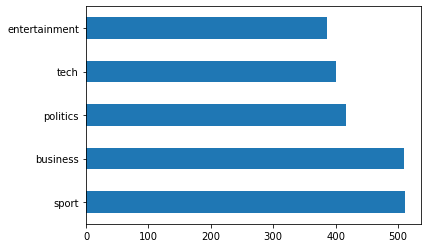

In [175]:
df=pd.read_csv('all_data.csv')
df.type.value_counts().plot.barh()
plt.savefig('bewbarh.png')

Create words length histogram plot for documents. We observe that the distribution is right skewed.

In [176]:
summary_series=df.summary.apply(lambda x:len(x.split()))

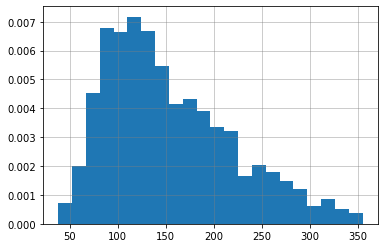

In [178]:
pd_series=summary_series
Q1=pd_series.quantile(.25)
Q3=pd_series.quantile(.75)
IQR=1.5*(Q3-Q1)
ax = plt.gca()
hist(pd_series[pd_series.between(Q1-IQR, Q3+IQR)],bins='freedman',ax=ax, density=True)
ax.grid(color='grey', alpha=0.5, linestyle='solid')    
plt.savefig('bewhist.png')

implement regex split text to sentence function so that we can calculate the sentence length for each document

In [179]:
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"
digits = "([0-9])" 
def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
    if "i.e." in text: text = text.replace("i.e.","i<prd>e<prd>")
    if "e.g." in text:text = text.replace("e.g.","e<prd>g<prd>")
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [180]:
df.type_code

0       1
1       1
2       1
3       1
4       1
       ..
2220    5
2221    5
2222    5
2223    5
2224    5
Name: type_code, Length: 2225, dtype: int64

In [181]:
df=df.rename(columns={'Unnamed: 0': 'doc'})

Plot the histogram for the sentence length distribution, we noticed that it is roughly normal.

In [182]:
df['summary_sentences']=df.summary.apply(lambda x:split_into_sentences(x))
# df['text_sentences']=df.summary.apply(lambda x:split_into_sentences(x))
df_summary_sentences=df.summary_sentences.explode().reset_index().rename(columns={'index': 'doc'})
df_summary_sentences=df_summary_sentences.merge(df[['doc','type_code']], on="doc", how = 'left')
df_summary_sentences.to_csv('summary_sentences.csv',index=False)

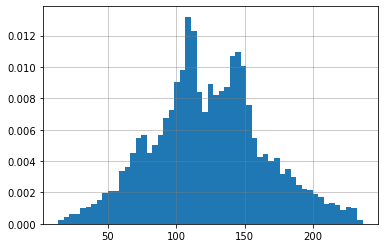

In [183]:
pd_series=df.summary_sentences.explode().apply(lambda x: len(x))
Q1=pd_series.quantile(.25)
Q3=pd_series.quantile(.75)
IQR=1.5*(Q3-Q1)
ax = plt.gca()
hist(pd_series[pd_series.between(Q1-IQR, Q3+IQR)],bins='freedman',ax=ax, density=True)
ax.grid(color='grey', alpha=0.5, linestyle='solid')   
plt.savefig('newsenthist.png')

In [148]:
df_by_type=df[['summary','type']].groupby('type').agg({'summary': ' '.join})

Draw word clouds on each categories summary text

In [185]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
sw.extend(['said','mr','u','would','could'])
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

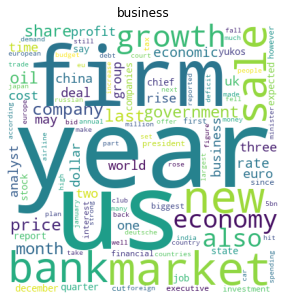

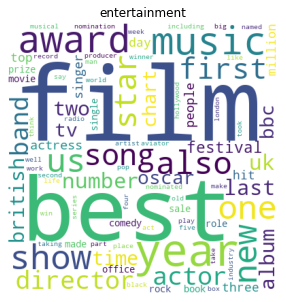

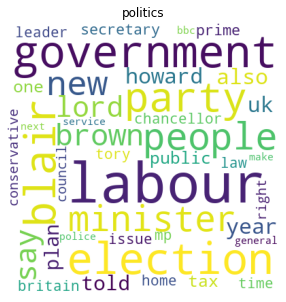

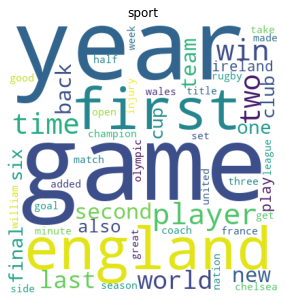

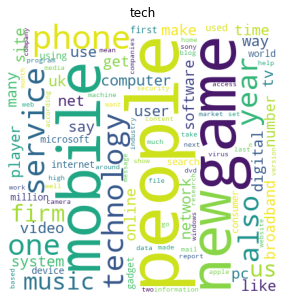

In [186]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter

for i in range(5):
    text =df_by_type.summary.iloc[i]
    wordcloud  = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = sw,
                    collocations = False,

                    min_font_size = 10).generate(text.lower()) 
    plt.figure(figsize = (4,4), facecolor = None) 
    plt.title(df_by_type.index[i])

    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig(df_by_type.index[i]+'.png')

    plt.show() 



Below is the same procedure on conll2003 dataset

In [6]:
import numpy as np

In [7]:
dataset['train'].features['ner_tags']

Sequence(feature=ClassLabel(num_classes=9, names=['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC'], names_file=None, id=None), length=-1, id=None)

In [8]:
df=pd.concat([pd.DataFrame(dataset['train']),(pd.DataFrame(dataset['validation'])),(pd.DataFrame(dataset['test']))])

In [9]:
# df = pd.DataFrame(dataset['train'])
df['sentence_length'] = df.tokens.apply(lambda x: len(x))
df

,chunk_tags,id,ner_tags,pos_tags,tokens,sentence_length
0,"[11, 21, 11, 12, 21, 22, 11, 12, 0]",0,"[3, 0, 7, 0, 0, 0, 7, 0, 0]","[22, 42, 16, 21, 35, 37, 16, 21, 7]","[EU, rejects, German, call, to, boycott, Briti...",9
1,"[11, 12]",1,"[1, 2]","[22, 22]","[Peter, Blackburn]",2
2,"[11, 12]",2,"[5, 0]","[22, 11]","[BRUSSELS, 1996-08-22]",2
3,"[11, 12, 12, 21, 13, 11, 11, 21, 13, 11, 12, 1...",3,"[0, 3, 4, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, ...","[12, 22, 22, 38, 15, 22, 28, 38, 15, 16, 21, 3...","[The, European, Commission, said, on, Thursday...",30
4,"[11, 11, 12, 13, 11, 12, 12, 11, 12, 12, 12, 1...",4,"[5, 0, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 0, 0, 0, ...","[22, 27, 21, 35, 12, 22, 22, 27, 16, 21, 22, 2...","[Germany, 's, representative, to, the, Europea...",31
...,...,...,...,...,...,...
3448,"[11, 21, 3, 11, 21, 1, 2, 11, 12, 13, 11, 0, 0...",3448,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]","[12, 42, 46, 12, 42, 30, 16, 12, 21, 15, 28, 6...","[That, is, why, this, is, so, emotional, a, ni...",16
3449,"[0, 11, 21, 11, 12, 17, 11, 11, 21, 13, 11, 12...",3449,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 28, 38, 12, 21, 15, 28, 12, 38, 15, 12, 21...","["", It, was, the, joy, that, we, all, had, ove...",33
3450,"[11, 21, 11, 13, 11, 12, 0, 13, 11, 12, 11, 21...",3450,"[1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[22, 38, 22, 15, 11, 24, 6, 15, 43, 21, 28, 38...","[Charlton, managed, Ireland, for, 93, matches,...",26
3451,"[11, 21, 11, 21, 11, 12, 12, 12, 12, 12, 0, 13...",3451,"[0, 0, 5, 0, 0, 0, 7, 8, 0, 0, 0, 0, 0, 0, 7, ...","[28, 38, 22, 35, 11, 16, 22, 22, 24, 24, 10, 3...","[He, guided, Ireland, to, two, successive, Wor...",34


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from astropy.visualization import hist


In [17]:
pd_series=df.sentence_length
Q1=pd_series.quantile(.25)
Q3=pd_series.quantile(.75)
IQR=1.5*(Q3-Q1)
ax = plt.gca()
hist(pd_series[pd_series.between(Q1-IQR, Q3+IQR)],bins='blocks',ax=ax, density=True)
ax.grid(color='grey', alpha=0.5, linestyle='solid')    
plt.savefig('a.png')


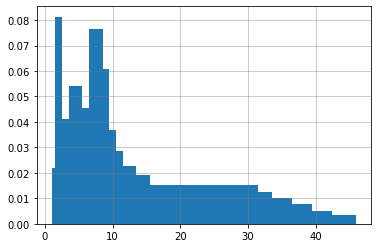

In [18]:
ax = plt.gca()
hist(pd_series[pd_series.between(Q1-IQR, Q3+IQR)],bins='blocks',ax=ax, density=True)
ax.grid(color='grey', alpha=0.5, linestyle='solid')    
plt.savefig('a.png')


Distribution of NER-Sentence_lenght Ratio

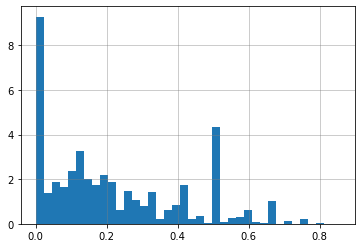

In [137]:
pd_series=df.ner_tags.apply(lambda x: len(np.nonzero(x)[0])/len(x))
Q1=pd_series.quantile(.25)
Q3=pd_series.quantile(.75)
IQR=1.5*(Q3-Q1)
from astropy.visualization import hist
ax = plt.gca()
hist(pd_series[pd_series.between(Q1-IQR, Q3+IQR)],bins='freedman',ax=ax, density=True)

ax.grid(color='grey', alpha=0.5, linestyle='solid')

In [63]:
# pip install astropy

<a list of 1 Patch objects>

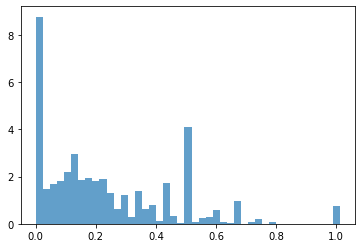

In [66]:

from astropy.visualization import hist
hist(df.ner_tags.apply(lambda x: len(np.nonzero(x)[0])/len(x)),bins='freedman',histtype='stepfilled',alpha=0.7, density=True)[2]

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Generate fake data
x = df.sentence_length
y = df.ner_tags.apply(lambda x: len(np.nonzero(x)[0]))

# Calculate the point density
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=100, edgecolor='')
# plt.show()

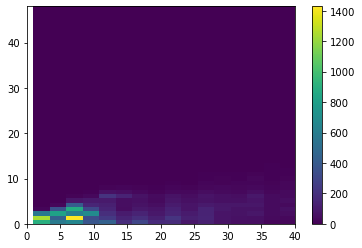

In [69]:


plt.hist2d(x, y, (50, 50))
plt.xlim([0, 40])
plt.colorbar()

In [139]:
ner_tag = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
tag_count = defaultdict(int)
for i in df.ner_tags:
    for j in i:
        tag_count[ner_tag[j]] += 1

In [140]:
df_tag_count = pd.DataFrame.from_dict(tag_count, 'index').sort_values(by =0)
df_tag_count.columns = ['counts']

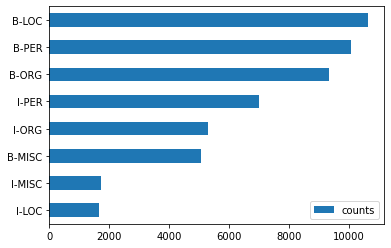

In [141]:
df_tag_count.iloc[:-1,:].plot.barh()

In [142]:
token_collection={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[]}
for l,i in enumerate(df.ner_tags):
    phrase=''
    j=0
    k=0
    while j < len(i):
        phrase+=df.tokens.iloc[l][j]
        if i[j]!=0 and j<=len(i)-2 and i[j]==i[j+1]:
                k=j
                while k<=len(i)-2:
                    if i[k]==i[k+1]:
                        phrase=phrase+'_'+df.tokens.iloc[l][k+1]
                        k+=1
                    else:
                        break
                token_collection[i[j]].append(phrase.lower())
                phrase=''
                j=k+1
        else:
            token_collection[i[j]].append(phrase.lower())
            j+=1
            phrase=''

In [144]:

from wordcloud import WordCloud, STOPWORDS 
from string import punctuation
st=set(punctuation)|set(STOPWORDS)
for i in range(9):
    token_collection[i]=[j for j in token_collection[i] if j not in st]

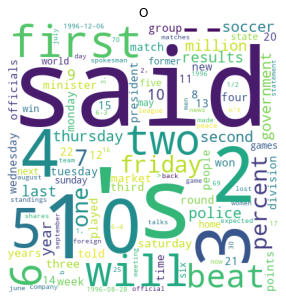

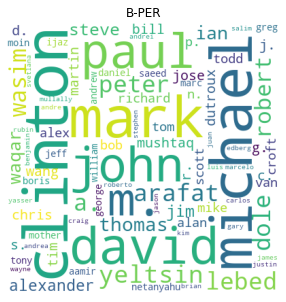

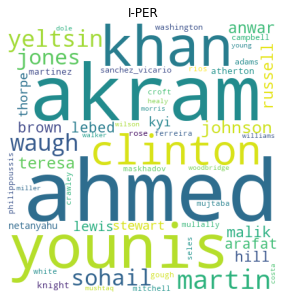

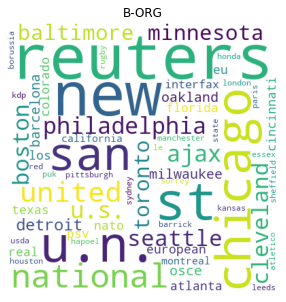

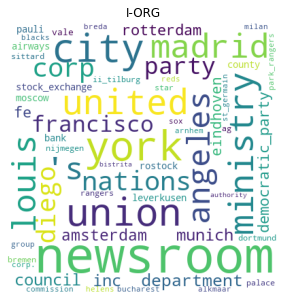

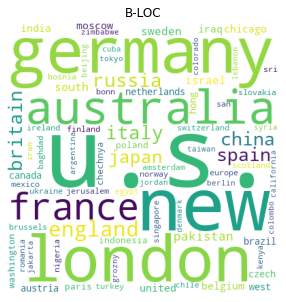

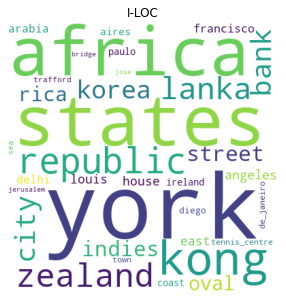

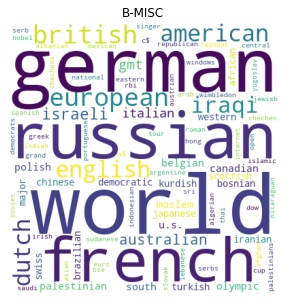

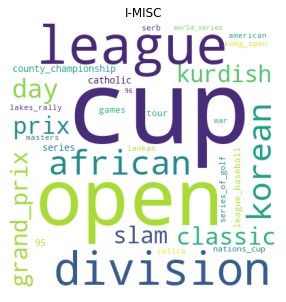

In [168]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from collections import Counter

stopwords = set(STOPWORDS) 

for i in range(9):
    text =Counter(token_collection[i])
    wordcloud  = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = stopwords,
                    collocations = False,
                    min_font_size = 10).generate_from_frequencies(text) 
    plt.figure(figsize = (4,4), facecolor = None) 
    plt.title(ner_tag[i])
    
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.savefig(ner_tag[i])
    plt.show() 

